In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise

import matplotlib.pyplot as plt
import numpy as np
import operator

%matplotlib inline

In [2]:
# IBMQ.load_account()

In [3]:
#Set up
n_iters = 2
n = 3**n_iters

q = QuantumRegister(n)
c = ClassicalRegister(1)

qc = QuantumCircuit(q, c)

In [4]:
#My Algorithm
def Majority_3(target,q1,q2):
        qc.cx(q[target],q[q1])
        qc.cx(q[target],q[q2])
        qc.ccx(q[q1],q[q2],q[target])
        
def Grouping(target,levels):
    list_dict = {}
    end_list = []
    for i in range(0,levels):
        if i == 0:
            list_dict[i] = [ [target, target + 1, target + 2] ]
        else:
            temp_list = []
            for last_list in list_dict[i-1]:
                for item in last_list:
                    temp_list = temp_list + [ [item, item + 3**i, item + 2*3**i] ]   
            list_dict[i] = temp_list
        end_list = list_dict[i] + end_list
    return end_list


In [5]:
for my_list in Grouping(0,n_iters):
    Majority_3(my_list[0],my_list[1],my_list[2])
    
qc.measure(q[0],c)

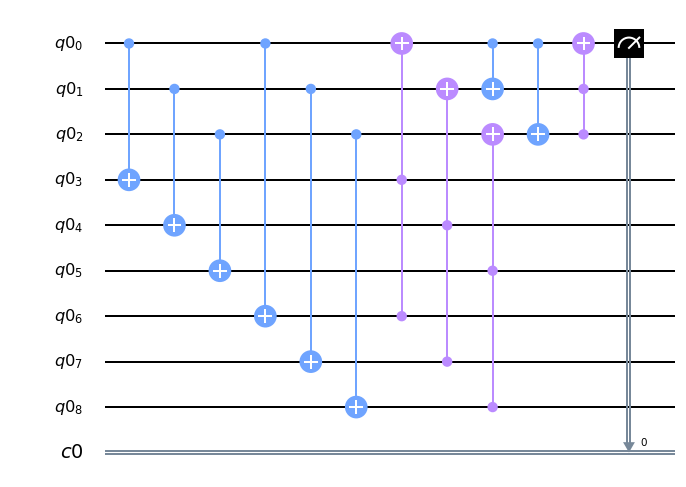

In [6]:
#Drawing
qc.draw(output='mpl')